In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
data_file_path = '/Users/emmyson/Resolvely/datasets/NCES Dataset.xlsx'

nces_dataset_excel = pd.read_excel(data_file_path, sheet_name= ['091 gr2022_pell_ssl'])

In [3]:
df = nces_dataset_excel['091 gr2022_pell_ssl']
df.head(10)

,UNITID,PSGRTYPE,XPGREVCT,PGREVCT,XPGEXCLU,PGEXCLU,XPGADJCT,PGADJCT,XPGCMBAC,PGCMBAC,...,XTTEXCLU,TTEXCLU,XTTADJCT,TTADJCT,XTTCMBAC,TTCMBAC,XTTCMOBA,TTCMOBA,XTTCMTOT,TTCMTOT
0,100654,1,R,1000,R,2,R,998,R,246.0,...,R,3,R,1404,R,376.0,R,0.0,R,376
1,100654,2,R,1000,R,2,R,998,R,246.0,...,R,3,R,1404,R,376.0,R,0.0,R,376
2,100663,1,R,778,R,2,R,776,R,424.0,...,R,3,R,1945,R,1237.0,R,16.0,R,1253
3,100663,2,R,768,R,2,R,766,R,424.0,...,R,3,R,1928,R,1237.0,R,2.0,R,1239
4,100663,3,R,10,Z,0,R,10,Z,0.0,...,R,0,R,17,R,0.0,R,14.0,R,14
5,100690,1,R,0,R,0,R,0,R,0.0,...,R,0,R,2,R,1.0,R,0.0,R,1
6,100690,2,R,0,Z,0,R,0,R,0.0,...,R,0,R,2,R,1.0,R,0.0,R,1
7,100706,1,R,242,R,0,R,242,R,122.0,...,R,0,R,1193,R,751.0,R,0.0,R,751
8,100706,2,R,242,Z,0,R,242,R,122.0,...,R,0,R,1193,R,751.0,R,0.0,R,751
9,100724,1,R,868,R,0,R,868,R,230.0,...,R,0,R,1143,R,317.0,R,0.0,R,317


In [4]:
df.dtypes

UNITID        int64
PSGRTYPE      int64
XPGREVCT     object
PGREVCT       int64
XPGEXCLU     object
PGEXCLU       int64
XPGADJCT     object
PGADJCT       int64
XPGCMBAC     object
PGCMBAC     float64
XPGCMOBA     object
PGCMOBA     float64
XPGCMTOT     object
PGCMTOT       int64
XSSREVCT     object
SSREVCT       int64
XSSEXCLU     object
SSEXCLU       int64
XSSADJCT     object
SSADJCT       int64
XSSCMBAC     object
SSCMBAC     float64
XSSCMOBA     object
SSCMOBA     float64
XSSCMTOT     object
SSCMTOT       int64
XNRREVCT     object
NRREVCT       int64
XNREXCLU     object
NREXCLU       int64
XNRADJCT     object
NRADJCT       int64
XNRCMBAC     object
NRCMBAC     float64
XNRCMOBA     object
NRCMOBA     float64
XNRCMTOT     object
NRCMTOT       int64
XTTREVCT     object
TTREVCT       int64
XTTEXCLU     object
TTEXCLU       int64
XTTADJCT     object
TTADJCT       int64
XTTCMBAC     object
TTCMBAC     float64
XTTCMOBA     object
TTCMOBA     float64
XTTCMTOT     object
TTCMTOT       int64


In [5]:
df.describe

<bound method NDFrame.describe of       UNITID  PSGRTYPE XPGREVCT  PGREVCT XPGEXCLU  PGEXCLU XPGADJCT  PGADJCT  \
0     100654         1        R     1000        R        2        R      998   
1     100654         2        R     1000        R        2        R      998   
2     100663         1        R      778        R        2        R      776   
3     100663         2        R      768        R        2        R      766   
4     100663         3        R       10        Z        0        R       10   
...      ...       ...      ...      ...      ...      ...      ...      ...   
8336  498562         2        R     1136        Z        0        R     1136   
8337  498562         3        R       93        Z        0        R       93   
8338  498571         1        R     1278        R        0        R     1278   
8339  498571         2        R     1094        R        0        R     1094   
8340  498571         3        R      184        Z        0        R      184   

     

In [9]:
obj_col = list(df.select_dtypes('object'))
df.drop(columns = obj_col, axis = 1, inplace = True)


In [10]:
df.shape

(8341, 26)

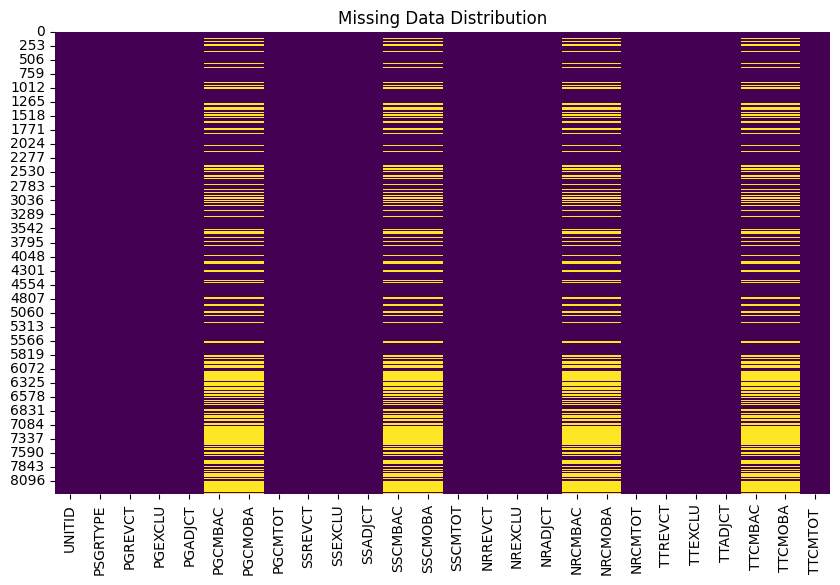

In [11]:
#Visualize missing values across dataset
col_with_null = df.isnull()

plt.figure(figsize = (10,6))
sns.heatmap(col_with_null, cbar = False, cmap = 'viridis')
plt.title('Missing Data Distribution')
plt.show()

In [12]:
df.fillna(0)

,UNITID,PSGRTYPE,PGREVCT,PGEXCLU,PGADJCT,PGCMBAC,PGCMOBA,PGCMTOT,SSREVCT,SSEXCLU,...,NRADJCT,NRCMBAC,NRCMOBA,NRCMTOT,TTREVCT,TTEXCLU,TTADJCT,TTCMBAC,TTCMOBA,TTCMTOT
0,100654,1,1000,2,998,246.0,0.0,246,123,0,...,283,82.0,0.0,82,1407,3,1404,376.0,0.0,376
1,100654,2,1000,2,998,246.0,0.0,246,123,0,...,283,82.0,0.0,82,1407,3,1404,376.0,0.0,376
2,100663,1,778,2,776,424.0,10.0,434,271,0,...,898,652.0,4.0,656,1948,3,1945,1237.0,16.0,1253
3,100663,2,768,2,766,424.0,1.0,425,268,0,...,894,652.0,0.0,652,1931,3,1928,1237.0,2.0,1239
4,100663,3,10,0,10,0.0,9.0,9,3,0,...,4,0.0,4.0,4,17,0,17,0.0,14.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8336,498562,2,1136,0,1136,516.0,0.0,516,930,0,...,938,586.0,3.0,589,3004,0,3004,1637.0,3.0,1640
8337,498562,3,93,0,93,19.0,4.0,23,46,0,...,20,4.0,4.0,8,159,0,159,39.0,15.0,54
8338,498571,1,1278,0,1278,482.0,15.0,497,820,1,...,704,392.0,22.0,414,2802,1,2801,1296.0,52.0,1348
8339,498571,2,1094,0,1094,452.0,0.0,452,735,1,...,618,374.0,3.0,377,2447,1,2446,1230.0,3.0,1233


In [13]:
col_list = list(df.columns)

for col in col_list:
        df[col] = stats.mstats.winsorize(df[col], limits=[0.01, 0.01])

In [1]:
df.isnull()

NameError: name 'df' is not defined